In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/score.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


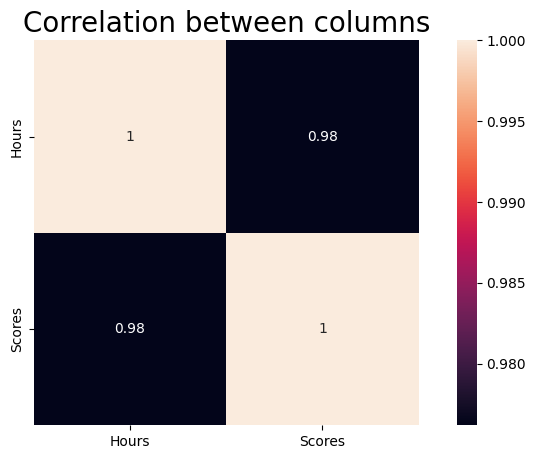

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(df.corr(),square=True, annot=True)
plt.title('Correlation between columns',fontsize=20);

In [ ]:
fig=px.scatter(df,
              x='Hours',
              y='Scores',
              opacity=0.8,
              title='Hours vs. Scores')
fig.update_traces(marker_size=5)
plt.figure(figsize=(10,6))
fig.show();

<Figure size 1000x600 with 0 Axes>

In [ ]:
inputs = df.drop(columns = ['Scores'], axis = 1, inplace=False)
targets = df.drop(columns = ['Hours'], axis = 1, inplace=False)

In [ ]:
train_inputs,test_inputs, train_targets, test_targets = train_test_split( inputs, targets, test_size=0.2, random_state=42)

In [ ]:
train_inputs

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [ ]:
train_targets

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [ ]:
model=LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
print('train_inputs.shape: ', train_inputs.shape)
print('train_targets.shape: ',train_targets.shape)

train_inputs.shape:  (20, 1)
train_targets.shape:  (20, 1)


In [ ]:
model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [[9.68207815]]
Intercept of the model:  [2.82689235]


In [ ]:
train_predictions=model.predict(train_inputs)

In [ ]:
train_predictions

array([[28.96850337],
       [34.77775026],
       [52.20549094],
       [39.61878934],
       [17.35000959],
       [33.80954245],
       [46.39624405],
       [88.99738793],
       [85.12455667],
       [36.71416589],
       [28.96850337],
       [21.22284085],
       [49.3008675 ],
       [61.8875691 ],
       [78.34710196],
       [56.0783222 ],
       [77.37889414],
       [13.47717832],
       [74.4742707 ],
       [91.90201137]])

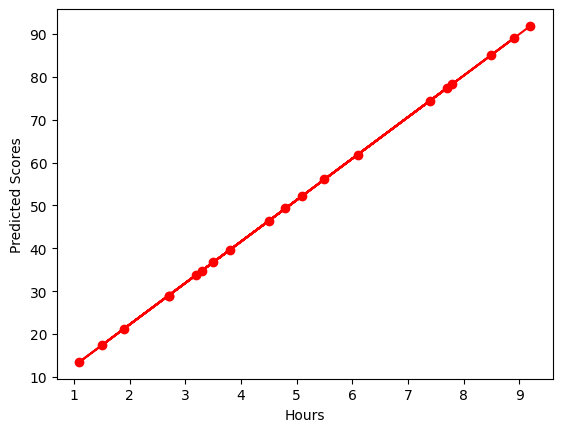

In [ ]:
plt.plot(train_inputs, train_predictions, 'r-o');
plt.xlabel('Hours');
plt.ylabel('Predicted Scores');

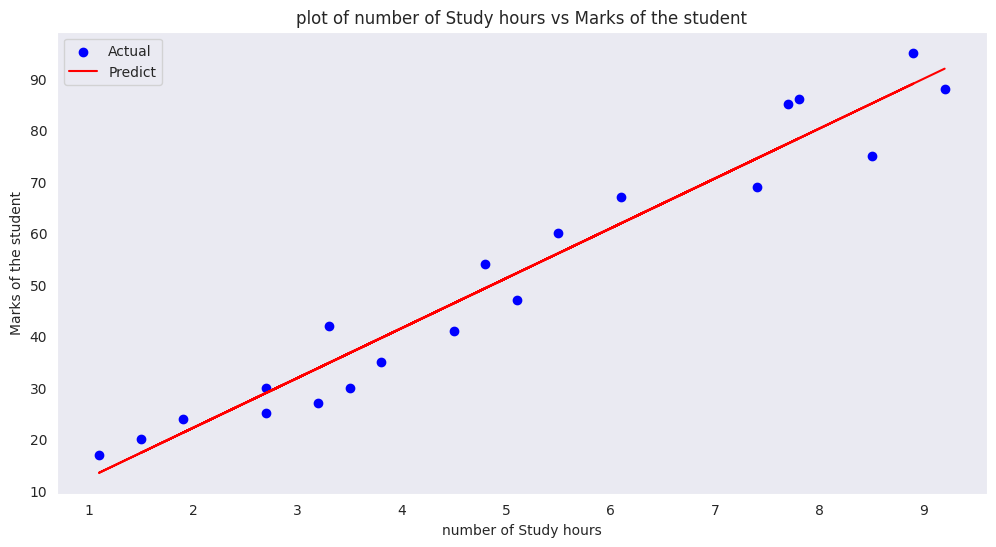

In [ ]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(train_inputs, train_targets, color='blue')
plt.plot(train_inputs, train_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

In [ ]:
score = model.score(train_inputs, train_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(train_targets,train_predictions)), 2))

Accuracy:  94.91
RMSE:      5.61


In [ ]:
test_predictions=model.predict(test_inputs)

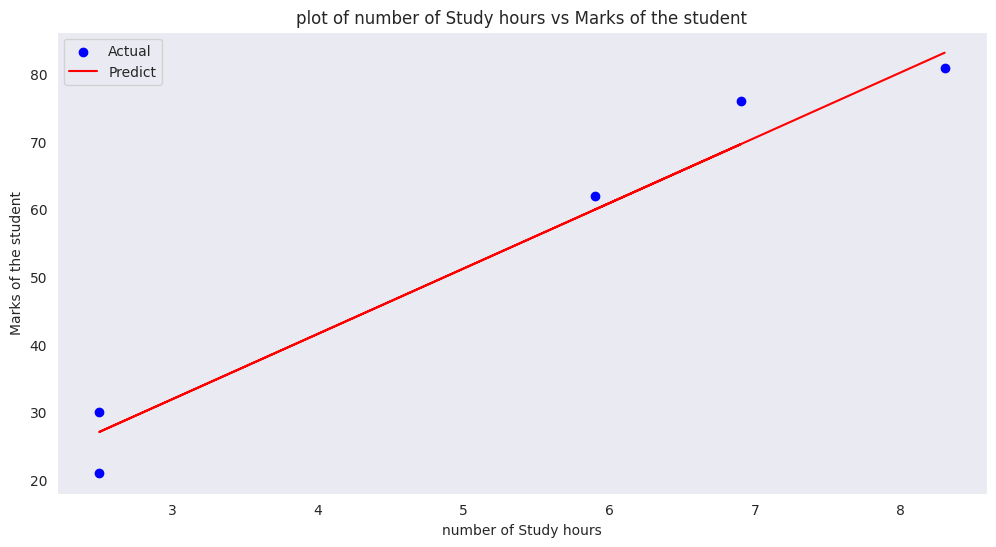

In [ ]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(test_inputs, test_targets, color='blue')
plt.plot(test_inputs, test_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

In [ ]:
score = model.score(test_inputs, test_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

Accuracy:  96.78
RMSE:      4.35


In [ ]:
print("Marks of student who studied 8 hours a day:  ", model.predict([[8]]))

Marks of student who studied 8 hours a day:   [[80.28351759]]


In [ ]:
print("Marks of student who studied 4.56 hours a day:  ", model.predict([[4.56]]))

Marks of student who studied 4.56 hours a day:   [[46.97716874]]
